# Institut des Algorithmes du Sénégal

# Learning Julia By Example
Below are a series of examples of common operations in Julia. They assume you already have Julia installed and working.

# 1. Hello World
The simplest possible script.

In [1]:
println("hello world")

hello world


# 2. Simple Functions
The example below shows two simple functions, how to call them and print the results. Further examples of number formatting are shown below.

In [2]:
# function to calculate the volume of a sphere
function sphere_vol(r)
    # julia allows Unicode names (in UTF-8 encoding)
    # so either "pi" or the symbol π can be used
    return 4/3*pi*r^3
end

vol = sphere_vol(3)
# @printf allows number formatting but does not 
# automatically append the \n to statements, see below
using Printf
@printf "volume = %0.3f\n" vol 

volume = 113.097


In [5]:
# functions can also be defined more succinctly
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

# calculates x for 0 = a*x^2+b*x+c, arguments types can be defined in function definitions
function quadratic2(a::Float64, b::Float64, c::Float64)
    # unlike other languages 2a is equivalent to 2*a
    # a^2 is used instead of a**2 or pow(a,2)
    sqr_term = sqrt(b^2-4a*c)
    r1 = quadratic(a, sqr_term, b)
    r2 = quadratic(a, -sqr_term, b)
    # multiple values can be returned from a function using tuples
    # if the return keyword is omitted, the last term is returned
    r1, r2
end

quad1, quad2 = quadratic2(2.0, -2.0, -12.0)
println("result 1: ", quad1)
println("result 2: ", quad2)

result 1: 3.0
result 2: -2.0


# 3.  Strings Basics
Collection of different string examples (string indexing is the same as array indexing: see below).

In [7]:
# strings are defined with double quotes
# like variables, strings can contain any unicode character
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"
println(s1)

The quick brown fox jumps over the lazy dog α,β,γ


In [8]:
# println adds a new line to the end of output
# print can be used if you dont want that:
print("this")
print(" and")
print(" that.\n")

this and that.


In [10]:
# chars are defined with single quotes
c1 = 'a'
println(c1)
# the ascii value of a char can be found with Int():
println(c1, " ascii value = ", Int(c1))
println("Int('α') == ", Int('α'))

a
a ascii value = 97
Int('α') == 945


In [11]:
# so be aware that
println(Int('1') == 1)

false


In [12]:
# strings can be converted to upper case or lower case:
s1_caps = uppercase(s1)
s1_lower = lowercase(s1)
println(s1_caps, "\n", s1_lower)

THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG Α,Β,Γ
the quick brown fox jumps over the lazy dog α,β,γ


In [13]:
# sub strings can be indexed like arrays:
# (show prints the raw value)
show(s1[11]); println()

'b'


In [14]:
# or sub strings can be created:
show(s1[1:10]); println()

"The quick "


In [15]:
# end is used for the end of the array or string
show(s1[end-10:end]); println()

"dog α,β,γ"


In [16]:
# julia allows string Interpolation:
a = "welcome"
b = "julia"
println("$a to $b.")

welcome to julia.


In [17]:
# this can extend to evaluate statements:
println("1 + 2 = $(1 + 2)")

1 + 2 = 3


In [18]:
# strings can also be concatenated using the * operator
# using * instead of + isn't intuitive when you start with Julia,
# however people think it makes more sense
s2 = "this" * " and" * " that"
println(s2)

this and that


In [19]:
# as well as the string function
s3 = string("this", " and", " that")
println(s3)

this and that


# 4. String: Converting and formatting

In [20]:
# strings can be converted using float and int:
e_str1 = "2.718"
e = parse(Float64, e_str1)
println(5e)
num_15 = parse(Int, "15")
println(3num_15)

13.59
45


In [21]:
# numbers can be converted to strings and formatted using printf
using Printf
@printf "e = %0.2f\n" e
# or to create another string sprintf
e_str2 = @sprintf("%0.3f", e)

e = 2.72


"2.718"

In [22]:
# to show that the 2 strings are the same
println("e_str1 == e_str2: $(e_str1 == e_str2)")

e_str1 == e_str2: true


In [23]:
# available number format characters are f, e, a, g, c, s, p, d:
# (pi is a predefined constant; however, since its type is 
# "MathConst" it has to be converted to a float to be formatted)
@printf "fix trailing precision: %0.3f\n" float(pi)
@printf "scientific form: %0.6e\n" 1000pi
@printf "float in hexadecimal format: %a\n" 0xff
@printf "fix trailing precision: %g\n" pi*1e8
@printf "a character: %c\n" 'α'
@printf "a string: %s\n" "look I'm a string!"
@printf "right justify a string: %50s\n" "width 50, text right justified!"
@printf "a pointer: %p\n" 100000000
@printf "print an integer: %d\n" 1e10

fix trailing precision: 3.142
scientific form: 3.141593e+03
float in hexadecimal format: 0xf.fp+4
fix trailing precision: 3.14159e+08
a character: α
a string: look I'm a string!
right justify a string:                    width 50, text right justified!
a pointer: 0x0000000005f5e100
print an integer: 10000000000


# 5. String Manipulations

In [24]:
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"

"The quick brown fox jumps over the lazy dog α,β,γ"

In [25]:
# search returns the first index of a char
i = findfirst(isequal('b'), s1)
println(i)
# the second argument is equivalent to the second argument of split, see below

11


In [26]:
# or a range if called with another string
r = findfirst("brown", s1)
println(r)

11:15


In [27]:
# string replace is done thus:
r = replace(s1, "brown" => "red")
show(r); println()

"The quick red fox jumps over the lazy dog α,β,γ"


In [28]:
# search and replace can also take a regular expressions by preceding the string with 'r'
r = findfirst(r"b[\w]*n", s1)
println(r)

11:15


In [29]:
# again with a regular expression
r = replace(s1, r"b[\w]*n" => "red")
show(r); println()

"The quick red fox jumps over the lazy dog α,β,γ"


In [30]:
# there are also functions for regular expressions that return RegexMatch types
# match scans left to right for the first match (specified starting index optional)
r = match(r"b[\w]*n", s1)
println(r)

RegexMatch("brown")


In [31]:
# RegexMatch types have a property match that holds the matched string
show(r.match); println()

"brown"


In [32]:
# eachmatch returns an iterator over all the matches
r = eachmatch(r"[\w]{4,}", s1)
for i in r print("\"$(i.match)\" ") end
println()

"quick" "brown" "jumps" "over" "lazy" 


In [33]:
r = collect(m.match for m = eachmatch(r"[\w]{4,}", s1))
println(r)

SubString{String}["quick", "brown", "jumps", "over", "lazy"]


In [34]:
# a string can be repeated using the repeat function, 
# or more succinctly with the ^ syntax:
r = "hello "^3
show(r); println()

"hello hello hello "


In [35]:
# the strip function works the same as python:
# e.g., with one argument it strips the outer whitespace
r = strip("hello ")
show(r); println()
# or with a second argument of an array of chars it strips any of them;
r = strip("hello ", ['h', ' '])
show(r); println()
# (note the array is of chars and not strings)

"hello"
"ello"


In [37]:
# similarly split works in basically the same way as python:
r = split("hello, there,bob", ',')
show(r); println()
r = split("hello, there,bob", ", ")
show(r); println()
r = split("hello, there,bob", [',', ' '], limit=0, keepempty=false)
show(r); println()
# (the last two arguements are limit and include_empty, see docs)

SubString{String}["hello", " there", "bob"]
SubString{String}["hello", "there,bob"]
SubString{String}["hello", "there", "bob"]


In [38]:
# the opposite of split: join is simply
r = join(collect(1:10), ", ")
println(r)

1, 2, 3, 4, 5, 6, 7, 8, 9, 10


# 6. Arrays

In [1]:
function printsum(a)
    # summary generates a summary of an object
    println(summary(a), ": ", repr(a))
end

printsum (generic function with 1 method)

In [2]:
# arrays can be initialised directly:
a1 = [1,2,3]
printsum(a1)

3-element Array{Int64,1}: [1, 2, 3]


In [3]:
# or initialised empty:
a2 = []
printsum(a2)

0-element Array{Any,1}: Any[]


In [4]:
# since this array has no type, functions like push! (see below) don't work
# instead arrays can be initialised with a type:
a3 = Int64[]
printsum(a3)

0-element Array{Int64,1}: Int64[]


In [5]:
# ranges are different from arrays:
a4 = 1:20
printsum(a4)

20-element UnitRange{Int64}: 1:20


In [6]:
# however they can be used to create arrays thus:
a4 = collect(1:20)
printsum(a4)

20-element Array{Int64,1}: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [7]:
# arrays can also be generated from comprehensions:
a5 = [2^i for i = 1:10]
printsum(a5)

10-element Array{Int64,1}: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [8]:
# arrays can be any type, so arrays of arrays can be created:
a6 = (Array{Int64, 1})[]
printsum(a6)
# (note this is a "jagged array" (i.e., an array of arrays), not a multidimensional array,
# these are not covered here)

0-element Array{Array{Int64,1},1}: Array{Int64,1}[]


In [9]:
# Julia provided a number of "Dequeue" functions, the most common
# for appending to the end of arrays is push!
# ! at the end of a function name indicates that the first argument is updated.

In [10]:
push!(a1, 4)
printsum(a1)

4-element Array{Int64,1}: [1, 2, 3, 4]


In [11]:
# push!(a2, 1) would cause error:

In [12]:
push!(a3, 1)
printsum(a3) #> 1-element Array{Int64,1}: [1]

1-element Array{Int64,1}: [1]


In [13]:
push!(a6, [1,2,3])
printsum(a6)

1-element Array{Array{Int64,1},1}: Array{Int64,1}[[1, 2, 3]]


In [14]:
# using repeat() to create arrays
# you must use the keywords "inner" and "outer"
# all arguments must be arrays (not ranges)
a7 = repeat(a1,inner=[2],outer=[1])
printsum(a7)
a8 = repeat(collect(4:-1:1),inner=[1],outer=[2])
printsum(a8)

8-element Array{Int64,1}: [1, 1, 2, 2, 3, 3, 4, 4]
8-element Array{Int64,1}: [4, 3, 2, 1, 4, 3, 2, 1]


# 7. Error Handling

In [15]:
# try, catch can be used to deal with errors as with many other languages
try
    push!(a,1)
catch err
    showerror(stdout, err, backtrace());println()
end
#> UndefVarError: a not defined
#> Stacktrace:
#>  [1] top-level scope at C:\JuliaByExample\src\error_handling.jl:5
#>  [2] include at .\boot.jl:317 [inlined]
#>  [3] include_relative(::Module, ::String) at .\loading.jl:1038
#>  [4] include(::Module, ::String) at .\sysimg.jl:29
#>  [5] exec_options(::Base.JLOptions) at .\client.jl:229
#>  [6] _start() at .\client.jl:421
println("Continuing after error")

UndefVarError: a not defined
Stacktrace:
 [1] top-level scope at In[15]:5
 [2] eval at ./boot.jl:330 [inlined]
 [3] softscope_include_string(::Module, ::String, ::String) at /opt/app-root/src/.julia/packages/SoftGlobalScope/cSbw5/src/SoftGlobalScope.jl:218
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /opt/app-root/src/.julia/packages/IJulia/F1GUo/src/execute_request.jl:67
 [5] #invokelatest#1 at ./essentials.jl:709 [inlined]
 [6] invokelatest at ./essentials.jl:708 [inlined]
 [7] eventloop(::ZMQ.Socket) at /opt/app-root/src/.julia/packages/IJulia/F1GUo/src/eventloop.jl:8
 [8] (::IJulia.var"#15#18")() at ./task.jl:333
Continuing after error


# 8. Dictionaries
Julia uses <a href="https://docs.julialang.org/en/v1/base/collections/#Dictionaries-1">Dicts</a> as associative collections. Usage is very like python except for the rather odd => definition syntax.

In [16]:
# dicts can be initialised directly:
a1 = Dict(1=>"one", 2=>"two")
printsum(a1) 

Dict{Int64,String} with 2 entries: Dict(2 => "two",1 => "one")


In [17]:
# then added to:
a1[3]="three"
printsum(a1)
# (note dicts cannot be assumed to keep their original order)

Dict{Int64,String} with 3 entries: Dict(2 => "two",3 => "three",1 => "one")


In [18]:
# dicts may also be created with the type explicitly set
a2 = Dict{Int64, AbstractString}()
a2[0]="zero"
printsum(a2)

Dict{Int64,AbstractString} with 1 entry: Dict{Int64,AbstractString}(0 => "zero")


In [19]:
# dicts, like arrays, may also be created from comprehensions
using Printf
a3 = Dict([i => @sprintf("%d", i) for i = 1:10])
printsum(a3)

Dict{Int64,String} with 10 entries: Dict(7 => "7",4 => "4",9 => "9",10 => "10",2 => "2",3 => "3",5 => "5",8 => "8",6 => "6",1 => "1")


In [20]:
# as you would expect, Julia comes with all the normal helper functions
# for dicts, e.g., haskey
println(haskey(a1,1))

true


In [22]:
# which is equivalent to
println(1 in keys(a1))
# where keys creates an iterator over the keys of the dictionary

true


In [23]:
# similar to keys, values get iterators over the dict's values:
printsum(values(a1)) 

Base.ValueIterator for a Dict{Int64,String} with 3 entries: ["two", "three", "one"]


In [24]:
# use collect to get an array:
printsum(collect(values(a1)))

3-element Array{String,1}: ["two", "three", "one"]


# 9. Loops and Map
<a href="https://docs.julialang.org/en/v1/manual/control-flow/#man-loops-1">For loops</a> can be defined in a number of ways.

In [25]:
for i in 1:5
    print(i, ", ")
end
#> 1, 2, 3, 4, 5,
# In loop definitions "in" is equivilent to "=" 
# (AFAIK, the two are interchangable in this context)
for i = 1:5
    print(i, ", ")
end
println()

1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 


In [26]:
# arrays can also be looped over directly:
a1 = [1,2,3,4]
for i in a1
    print(i, ", ")
end
println()

1, 2, 3, 4, 


In [27]:
# continue and break work in the same way as python
a2 = collect(1:20)
for i in a2
    if i % 2 != 0
        continue
    end
    print(i, ", ")
    if i >= 8
        break
    end
end
println()

2, 4, 6, 8, 


In [28]:
# if the array is being manipulated during evaluation a while loop shoud be used
# pop removes the last element from an array
while !isempty(a1)
    print(pop!(a1), ", ")
end
println()

4, 3, 2, 1, 


In [29]:
d1 = Dict(1=>"one", 2=>"two", 3=>"three")
# dicts may be looped through using the keys function:
for k in sort(collect(keys(d1)))
    print(k, ": ", d1[k], ", ")
end
println()

1: one, 2: two, 3: three, 


In [30]:
# like python enumerate can be used to get both the index and value in a loop
a3 = ["one", "two", "three"]
for (i, v) in enumerate(a3)
    print(i, ": ", v, ", ")
end
println()

1: one, 2: two, 3: three, 


In [31]:
# (note enumerate starts from 1 since Julia arrays are 1 indexed unlike python)

In [32]:
# map works as you might expect performing the given function on each member of 
# an array or iter much like comprehensions
a4 = map((x) -> x^2, [1, 2, 3, 7])
print(a4) 
println()

[1, 4, 9, 49]


# 10. Conditional Evaluation
If/Else statements work much like other languages - the boolean opperators are <code>true</code> and <code>false</code>.

In [3]:
if true
    println("Institut des Algorithmes du Sénégal")
else
    println("Go learn with IAS !")
end

Institut des Algorithmes du Sénégal


In [35]:
if false
   println("It's true!")
else
   println("It's false!")
end

It's false!


In [36]:
# Numbers can be compared with opperators like <, >, ==, !=

In [37]:
1 == 1

true

In [38]:
1 > 2

false

In [39]:
"foo" != "bar"

true

In [40]:
# and many functions return boolean values

In [41]:
occursin("that", "this and that")

true

In [4]:
# More complex logical statments can be achieved with `elseif`
function checktype(x)
   if x isa Int
      println("Look! An Int!")
   elseif x isa AbstractFloat
      println("Look! A Float!")
   elseif x isa Complex
      println("Whoa, that's complex!")
   else
      println("I have no idea what that is")
   end
end

checktype (generic function with 1 method)

In [43]:
checktype(2)

Look! An Int!


In [44]:
checktype(√2)

Look! A Float!


In [45]:
checktype(√Complex(-2))

Whoa, that's complex!


In [46]:
checktype("who am I?")

I have no idea what that is


In [47]:
# For simple logical statements, one can be more terse using the "ternary operator",
# which takes the form `predicate ? do_if_true : do_if_false`

In [48]:
1 > 2 ? println("that's true!") : println("that's false!")

that's false!


In [49]:
noisy_sqrt(x) = x ≥ 0 ? sqrt(x) : "That's negative!"
noisy_sqrt(4)
#> 2.0
noisy_sqrt(-4)

"That's negative!"

In [50]:
# "Short-circuit evaluation" offers another option for conditional statements.
# The opperators `&&` for AND and `||` for OR only evaluate the right-hand
# statement if necessary based on the predicate.
# Logically, if I want to know if `42 == 0 AND x < y`,
# it doesn't matter what `x` and `y` are, since the first statement is false.
# This can be exploited to only evaluate a statement if something is true -
# the second statement doesn't even have to be boolean!

In [52]:
everything = 42
everything < 100 && println("that's true!")
everything == 0 && println("that's true!")

that's true!


false

In [53]:
√everything > 0 || println("that's false!")

true

In [54]:
√everything == everything || println("that's false!")

that's false!


# Types
Types are a key way of structuring data within Julia.

In [55]:
# Type Definitions are probably most similar to tyepdefs in c?
# a simple type with no special constructor functions might look like this
mutable struct Person
    name::AbstractString
    male::Bool
    age::Float64
    children::Int
end

In [56]:
p = Person("Julia", false, 4, 0)
printsum(p)

Person: Person("Julia", false, 4.0, 0)


In [57]:
people = Person[]
push!(people, Person("Steve", true, 42, 0))
push!(people, Person("Jade", false, 17, 3))
printsum(people)

2-element Array{Person,1}: Person[Person("Steve", true, 42.0, 0), Person("Jade", false, 17.0, 3)]


In [58]:
# types may also contains arrays and dicts
# constructor functions can be defined to easily create objects
mutable struct Family
    name::AbstractString
    members::Array{AbstractString, 1}
    extended::Bool
    # constructor that takes one argument and generates a default
    # for the other two values
    Family(name::AbstractString) = new(name, AbstractString[], false)
    # constructor that takes two arguements and infers the third
    Family(name::AbstractString, members) = new(name, members, length(members) > 3)
end

In [59]:
fam1 = Family("blogs")
println(fam1)

Family("blogs", AbstractString[], false)


In [60]:
fam2 = Family("jones", ["anna", "bob", "charlie", "dick"])
println(fam2)

Family("jones", AbstractString["anna", "bob", "charlie", "dick"], true)


# Packages and Including of Files
<a href="https://pkg.julialang.org/docs/">Packages</a> extend the functionality of Julia's standard library.

In [61]:
# You might not want to run this file completely, as the Pkg-commands can take a
# long time to complete.
using Pkg

In [63]:
# install one package (e.g. Calculus) and all its dependencies:
Pkg.add("Calculus")

  Updating registry at `~/.julia/registries/General`
 Resolving package versions...


┌ Warning: Some registries failed to update:
│     — `~/.julia/registries/General` — registry dirty
└ @ Pkg.Types /builddir/build/BUILD/julia/build/usr/share/julia/stdlib/v1.3/Pkg/src/Types.jl:1199


 Installed Calculus ─ v0.5.1
  Updating `~/.julia/environments/v1.3/Project.toml`
  [49dc2e85] + Calculus v0.5.1
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [49dc2e85] + Calculus v0.5.1
  [37e2e46d] + LinearAlgebra 


In [64]:
Pkg.installed()

Dict{String,Union{Nothing, VersionNumber}} with 2 entries:
  "IJulia"   => v"1.20.2"
  "Calculus" => v"0.5.1"

In [65]:
# to use a package:
using Calculus

┌ Info: Precompiling Calculus [49dc2e85-a5d0-5ad3-a950-438e2897f1b9]
└ @ Base loading.jl:1273


In [67]:
# will import all functions of that package into the current namespace, so that
# it is possible to call
derivative(x -> sin(x), 1.0)

0.5403023058631036

In [68]:
import Calculus
# will enable you to specify which package the function is called from
Calculus.derivative(x -> cos(x), 1.0)

-0.8414709847974693

# Plotting
Plotting in Julia is only possible with additional Packages. Examples of some of the main packages are given below.

In [69]:
Pkg.add("Plots")

 Resolving package versions...
 Installed SortingAlgorithms ── v0.3.1
 Installed PlotThemes ───────── v1.0.1
 Installed PlotUtils ────────── v0.6.2
 Installed Contour ──────────── v0.5.1
 Installed StaticArrays ─────── v0.12.1
 Installed FixedPointNumbers ── v0.6.1
 Installed ColorTypes ───────── v0.9.1
 Installed Plots ────────────── v0.28.4
 Installed Showoff ──────────── v0.3.1
 Installed Colors ───────────── v0.11.2
 Installed Measures ─────────── v0.3.1
 Installed Missings ─────────── v0.4.3
 Installed Reexport ─────────── v0.2.0
 Installed Requires ─────────── v1.0.0
 Installed FFMPEG ───────────── v0.2.4
 Installed RecipesBase ──────── v0.7.0
 Installed DataAPI ──────────── v1.1.0
 Installed OrderedCollections ─ v1.1.0
 Installed GeometryTypes ────── v0.7.7
 Installed DataStructures ───── v0.17.9
 Installed StatsBase ────────── v0.32.0
 Installed NaNMath ──────────── v0.3.3
 Installed GR ───────────────── v0.44.0
  Updating `~/.julia/environments/v1.3/Project.toml`
  [91a5bcdd] 

In [71]:
Pkg.add("GR")

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


┌ Info: Saved animation to 
│   fn = /opt/app-root/src/data/tmp.gif
└ @ Plots /opt/app-root/src/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/opt/app-root/src/data/tmp.gif")
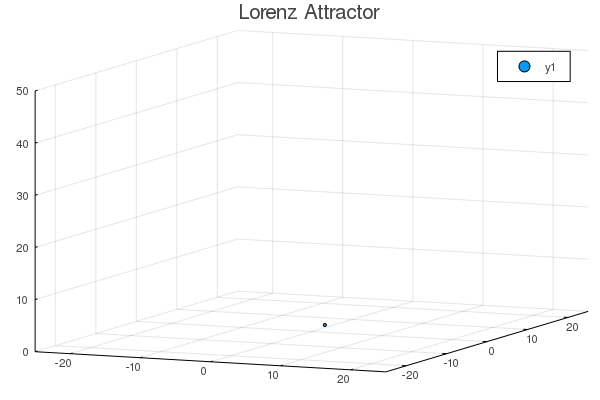

In [75]:
# define the Lorenz attractor
mutable struct Lorenz
    dt; σ; ρ; β; x; y; z
end

function step!(l::Lorenz)
    dx = l.σ*(l.y - l.x)       ; l.x += l.dt * dx
    dy = l.x*(l.ρ - l.z) - l.y ; l.y += l.dt * dy
    dz = l.x*l.y - l.β*l.z     ; l.z += l.dt * dz
end

attractor = Lorenz((dt = 0.02, σ = 10., ρ = 28., β = 8//3, x = 1., y = 1., z = 1.)...)


# initialize a 3D plot with 1 empty series
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz Attractor", marker = 2)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

In [76]:
using Plots

# plot some data
plot([cumsum(rand(500) .- 0.5), cumsum(rand(500) .- 0.5)])

# save the current figure
savefig("plots.svg")
# .eps, .pdf, & .png are also supported
# we used svg here because it respects the width and height specified above